In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [3]:
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\OnlineRetail rmf data.csv", encoding='latin1')


In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
data.isna().count()

InvoiceNo      541909
StockCode      541909
Description    541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     541909
Country        541909
dtype: int64

In [6]:
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# How many countries in data:

data['Country'].nunique()

38

In [9]:
# The names of the countries with the total values:

data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
data.sort_values(by='UnitPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom


In [45]:
# Number of unique products:

data['CustomerID'].nunique()

4372

In [12]:
# Most purchased items:

most=data.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head();most

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


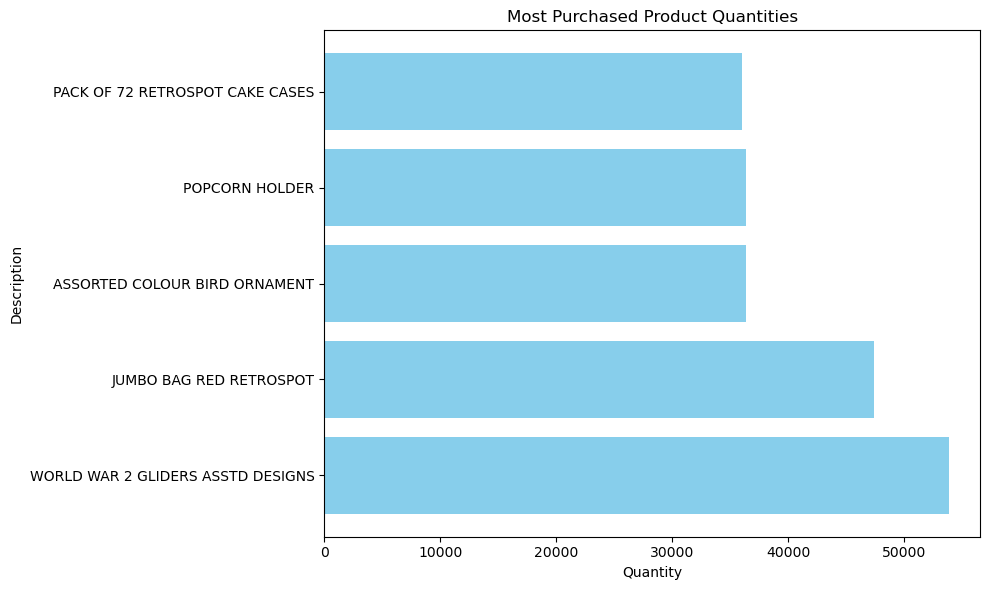

In [13]:
import matplotlib.pyplot as plt

# Data
products = [
    "WORLD WAR 2 GLIDERS ASSTD DESIGNS",
    "JUMBO BAG RED RETROSPOT",
    "ASSORTED COLOUR BIRD ORNAMENT",
    "POPCORN HOLDER",
    "PACK OF 72 RETROSPOT CAKE CASES",
]
quantities = [53847, 47363, 36381, 36334, 36039]

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(products, quantities, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Description')
plt.title('Most Purchased Product Quantities')

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
# least purchased items:

least=data.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=True).head();least

,Quantity
Description,
printing smudges/thrown away,-19200
"Unsaleable, destroyed.",-15644
check,-12030
Printing smudges/thrown away,-9058
Damaged,-7540


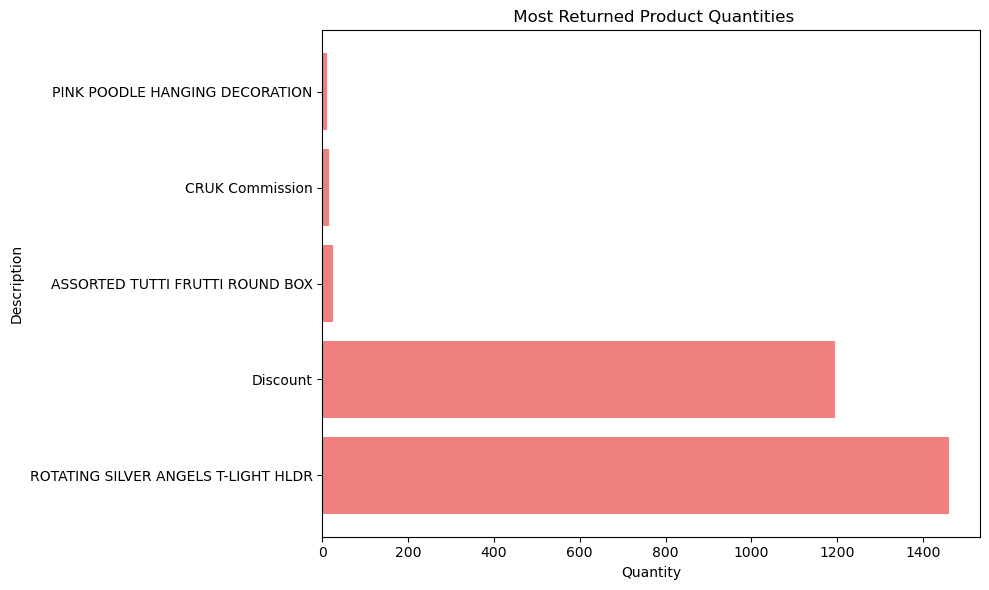

In [15]:
import matplotlib.pyplot as plt

# Data
descriptions = [
    "ROTATING SILVER ANGELS T-LIGHT HLDR",
    "Discount",
    "ASSORTED TUTTI FRUTTI ROUND BOX",
    "CRUK Commission",
    "PINK POODLE HANGING DECORATION",
]
quantities = [1460, 1194, 24, 16, 12]

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(descriptions, quantities, color='lightcoral')
plt.xlabel('Quantity')
plt.ylabel('Description')
plt.title(' Most Returned Product Quantities')

# Show the plot
plt.tight_layout()
plt.show()


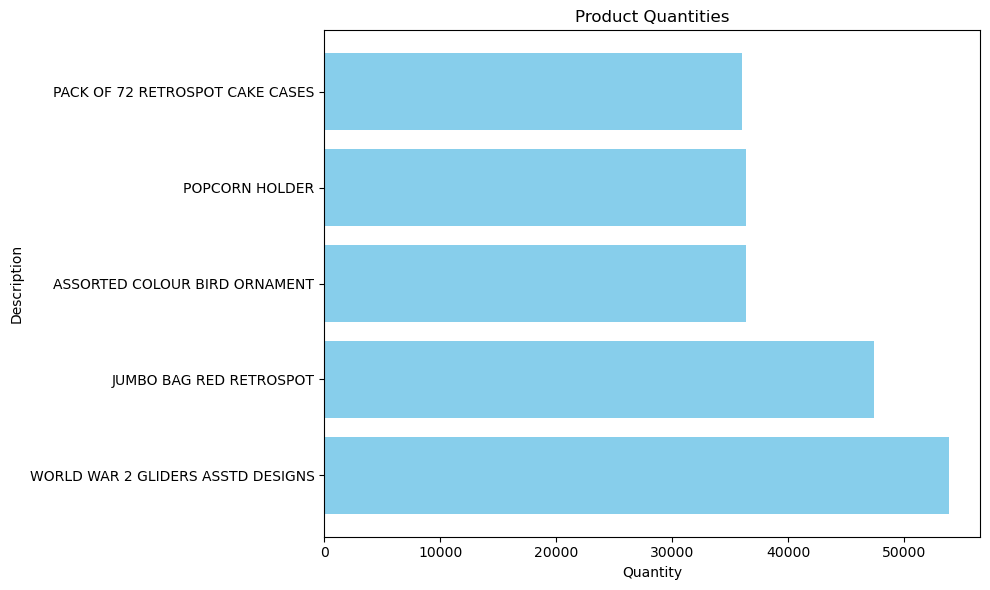

In [16]:
import matplotlib.pyplot as plt

# Data
products = [
    "WORLD WAR 2 GLIDERS ASSTD DESIGNS",
    "JUMBO BAG RED RETROSPOT",
    "ASSORTED COLOUR BIRD ORNAMENT",
    "POPCORN HOLDER",
    "PACK OF 72 RETROSPOT CAKE CASES",
]
quantities = [53847, 47363, 36381, 36334, 36039]

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(products, quantities, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Description')
plt.title('Product Quantities')

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
# check the number of uniques for StockCode ve Description variables:

print(f"Number of uniques in StockCode: {data['StockCode'].nunique()}")
print(f"Number of uniques in Description:{data['Description'].nunique()}")

Number of uniques in StockCode: 4070
Number of uniques in Description:4223


In [18]:
#DATA PREPERATION

In [19]:
data.dropna(inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [21]:
data.describe().T
# there are negative values on Quantity variable, this is caused by the refund invoices (Invoices containing the letter "C"), reassign df without refund invoices

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [22]:
#negative values are excluded. We are not removing outliers (such as the max value on Quantity and Price variables) because we will be scoring the dataset.

In [23]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


## RFM Metrics

In [35]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [36]:
# assign "today's date" as 2 days after the last date of purchase to make sure that none of the Recency values become zero
import datetime as dt

In [37]:
import pandas as pd
import datetime as dt

# Assuming 'InvoiceDate' is in a datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Find the maximum date in the 'InvoiceDate' column
max_date = data['InvoiceDate'].max()

# Add a timedelta of 2 days to the maximum date
today_date = max_date + dt.timedelta(days=2)

# Print the result
print(today_date)


2011-12-11 12:50:00


create a new data called rfm in order to calculate Recency, Frequency and Monetary values.

data is grouped by customers and:

the number of days between today_date and the last purchase date of this customer is Recency
the number of unique invoices of this customer is Frequency
the sum of TotalPrice is this customer's Monetary

In [29]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [30]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [29]:
print(data.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  
541904 2011-12-09 12:50:00       0.85     12680.0  France       10.20  
541905 2011-12-09 12:50:00       2.10     12680.0  France       12.60  
541906 2011-12-09 12:50:00       4.15     12680.0  France       16.60  
541907 2011-12-09 12:50:00       4.15     12680.0  France       16.60  
541908 2011-12-09 12:50:00       4.95     12680.0  France       14.85  


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   TotalPrice   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [31]:
# Convert 'FloatColumn' to an integer column
data['CustomerID'] = data['CustomerID'].astype(int)

# Print the DataFrame
print(data)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

In [74]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency_x,Monetary_x,Total,Frequency_y,Monetary_y,RecencyScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,4739,312,5288.63,15.30,312,5288.63,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,4739,312,5288.63,22.00,312,5288.63,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1


In [75]:
from datetime import datetime

# Convert 'PurchaseDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Recency
data['Recency'] = (datetime.now().date() - data['InvoiceDate'].dt.date).dt.days

# Calculate Frequency
frequency_data = data.groupby('CustomerID')['StockCode'].count().reset_index()

frequency_data.rename(columns={'StockCode': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary 
monetary_data = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_data.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

In [77]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency_x,Monetary_x,Total,Frequency_y,Monetary_y,RecencyScore,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,4739,312,5288.63,15.30,312,5288.63,1,312,5288.63
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1,312,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,4739,312,5288.63,22.00,312,5288.63,1,312,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1,312,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1,312,5288.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,4366,52,862.81,10.20,52,862.81,5,52,862.81
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,4366,52,862.81,12.60,52,862.81,5,52,862.81
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4366,52,862.81,16.60,52,862.81,5,52,862.81
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4366,52,862.81,16.60,52,862.81,5,52,862.81


In [44]:
data['Recency'] = data.groupby(by='CustomerID', 
                        as_index=False)['InvoiceDate'].max()
data['Recency'].columns = ['CustomerID', 'today_date']
recent_date = data_recency['today_date'].max()
data_recency['Recency'] = data_recency['today_date'].apply(
    lambda x: (recent_date - x).days)
data

frequency_data = data.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_data.columns = ['CustomerID', 'Frequency']
frequency_data.head()

data['Total'] = data['UnitPrice']*data['Quantity']
monetary_data = data.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_data.columns = ['CustomerID', 'Monetary']
monetary_data.head()
print(data_recency,frequency_data,monetary_data)

      CustomerID          today_date  Recency
0          12346 2011-01-18 10:17:00      325
1          12347 2011-12-07 15:52:00        1
2          12348 2011-09-25 13:13:00       74
3          12349 2011-11-21 09:51:00       18
4          12350 2011-02-02 16:01:00      309
...          ...                 ...      ...
4367       18280 2011-03-07 09:52:00      277
4368       18281 2011-06-12 10:53:00      180
4369       18282 2011-12-02 11:43:00        7
4370       18283 2011-12-06 12:02:00        3
4371       18287 2011-10-28 09:29:00       42

[4372 rows x 3 columns]       CustomerID  Frequency
0          12346          2
1          12347        182
2          12348         31
3          12349         73
4          12350         17
...          ...        ...
4367       18280         10
4368       18281          7
4369       18282         13
4370       18283        721
4371       18287         70

[4372 rows x 2 columns]       CustomerID  Monetary
0          12346      0.00
1       

In [69]:
recency_data = data.groupby(by='CustomerID', 
                        as_index=False)['InvoiceDate'].max()
recency_data.columns = ['CustomerID', 'InvoiceDate']
recent_date = recency_data['InvoiceDate'].max()
recency_data['Recency'] = recency_data['InvoiceDate'].apply(
    lambda x: (recent_date - x).days)
recency_data

,CustomerID,InvoiceDate,Recency
0,12346,2011-01-18 10:17:00,325
1,12347,2011-12-07 15:52:00,1
2,12348,2011-09-25 13:13:00,74
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,309
...,...,...,...
4367,18280,2011-03-07 09:52:00,277
4368,18281,2011-06-12 10:53:00,180
4369,18282,2011-12-02 11:43:00,7
4370,18283,2011-12-06 12:02:00,3


In [59]:
frequency_data = data.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_data.columns = ['CustomerID','Frequency']
frequency_data

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,13
4370,18283,721


In [61]:
monetary_data

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2094.88


In [67]:
result=pd.Series(['data_recency','frequency_data','monetary_data']);result

0      data_recency
1    frequency_data
2     monetary_data
dtype: object

In [36]:
data = data.rename(columns={'Frequency_x': 'Frequency'})
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,4737,312,5288.63
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4737,312,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,4737,312,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4737,312,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4737,312,5288.63
...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,4364,52,862.81
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,4364,52,862.81
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4364,52,862.81
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4364,52,862.81


In [37]:
print(data[1234:1556])

     InvoiceNo StockCode                        Description  Quantity  \
1234    536531     22768         FAMILY PHOTO FRAME CORNICE         6   
1235    536532     84692        BOX OF 24 COCKTAIL PARASOLS        50   
1236    536532     22444      GROW YOUR OWN PLANT IN A CAN         96   
1237    536532     22899       CHILDREN'S APRON DOLLY GIRL          8   
1238    536532     21156          RETROSPOT CHILDRENS APRON         8   
...        ...       ...                                ...       ...   
1551    536557     22114  HOT WATER BOTTLE TEA AND SYMPATHY         1   
1552    536557     22753    SMALL YELLOW BABUSHKA NOTEBOOK          9   
1553    536557    79066K                     RETRO MOD TRAY         1   
1554    536557     22794      SWEETHEART WIRE MAGAZINE RACK         1   
1555    536557     22592      CARDHOLDER HOLLY WREATH METAL         1   

             InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
1234 2010-12-01 13:23:00       9.95       15

In [72]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['Monetary'], bins=5, labels=monetary_scores)

KeyError: 'Frequency'

In [39]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['Monetary'], bins=5, labels=monetary_scores)

In [73]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency_x,Monetary_x,Total,Frequency_y,Monetary_y,RecencyScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,4739,312,5288.63,15.30,312,5288.63,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,4739,312,5288.63,22.00,312,5288.63,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,4739,312,5288.63,20.34,312,5288.63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,4366,52,862.81,10.20,52,862.81,5
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,4366,52,862.81,12.60,52,862.81,5
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4366,52,862.81,16.60,52,862.81,5
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4366,52,862.81,16.60,52,862.81,5


In [68]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

KeyError: 'RecencyScore'

In [42]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

In [43]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   

   Recency  Frequency  Monetary  RecencyScore  FrequencyScore  MonetaryScore  \
0     4737        312   5288.6

In [2]:
# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

NameError: name 'data' is not defined

In [45]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

        CustomerID RFM Customer Segments
0            17850                  Lost
1            17850                  Lost
2            17850                  Lost
3            17850                  Lost
4            17850                  Lost
...            ...                   ...
406824       12680   Potential Loyalists
406825       12680   Potential Loyalists
406826       12680   Potential Loyalists
406827       12680   Potential Loyalists
406828       12680   Potential Loyalists

[406829 rows x 2 columns]


In [46]:
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

In [47]:
# Filter the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

Now let’s analyze the correlation of the recency, frequency, and monetary scores within the champions segment:

In [48]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

In [49]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

Now let’s have a look at the recency, frequency, and monetary scores of all the segments:

In [50]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = data.groupby('RFM Customer Segments')['RecencyScore', 'FrequencyScore', 'MonetaryScore'].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18736\1663265694.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Summary:
RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business. I hope you liked this article on RFM Analysis using Python. Feel free to ask valuable questions in the comments section below.